In [1]:
import os
# Change the terminal placement to the folder where the py files  are located  
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code') 
# We position ourselves in the directory where the main classes are located.
print(f" You are currently in the directory: {os.getcwd()}")

 You are currently in the directory: /Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code


In [2]:
from Zoro import *
from functions import *
from Zoro_MD import * 
from help_function import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [3]:
mpl.style.use('seaborn')

In [4]:
# problem set up
n = 2000
s = int(0.1*n)
# noise amplitude
noiseamp = 0.001
#noiseamp = 0 
decay_factor=0.5
x_star=tools.sparse_vector(n=n,s=s)
#x_star=tools.vecteur_sparse_support_S(n=n,s=s)
A=np.random.normal(size=(n,n)) # Simulate a Gaussian Matrix for the norm_with_a_Gaussian_matrix function
#obj_func = SparseQuadric(n, s, noiseamp)
#obj_func=CompressibleQuadric(n=n, decay_factor=decay_factor, noiseamp=noiseamp)
#obj_func=SparseQuadric(n, s, noiseamp)
#obj_func=square_of_the_difference_support_S(n,x_star,noiseamp)
obj_func=norm_with_a_Gaussian_matrix(n,x_star,noiseamp,A)
# Choose initialization
x0    = np.random.randn(n)
x0    = 100*x0/np.linalg.norm(x0)
#xx0   = copy.deepcopy(x0)

sparsity = s
#sparsity = int(0.1*len(x0)) # This is a decent default, if no better estimate is known. 

# Parameters for ZORO. Defaults are fine in most cases
params = {"step_size":0.5, "delta": 0.0001, "max_cosamp_iter": 10, 
          "cosamp_tol": 0.5,"sparsity": sparsity,
          "num_samples": int(np.ceil(np.log(len(x0))*sparsity))}

performance_log_ZORO = [[0, obj_func(x0)]]

In [5]:
#IHT set up 
lamda_IHT=10 # lambda initialisation 
threshold_IHT=0.01 # lambda threshold
C_IHT=0.9 # The update param for the lambda_k at each itteration.  
step_IHT=1/(3*(n**2))# The step of the IHT algo 
itt_IHT=50  # The maximum number of itterations for the IHT algo

In [6]:
#ISTA set up 
lamda_ISTA=4 # lambda initialisation 
threshold_ISTA=0.01 # lambda threshold
C_ISTA=0.9 # The update param for the lambda_k at each itteration.  
step_ISTA=1/(3*n) # The step of the IHT algo 
itt_ISTA=40  # The maximum number of itterations for the IHT algo



In [7]:
# IHT classique set up
itt_IHT_cla=5
setp_IHT_cla=0.5
s_IHT=sparsity

In [8]:
#Original Version of the Zoro Algo with different algos for estimating the gradient
opt_Co  = ZORO(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),x_star=x_star)
opt_Lasso  = ZORO(x0, obj_func, params,algo='Lasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)
opt_DLasso  = ZORO(x0, obj_func, params,algo='DLasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)
opt_IHT  = ZORO(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT_cla,step_IHT=setp_IHT_cla)
opt_IHT_ad  = ZORO(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),threshold_IHT=threshold_IHT,C_IHT=C_IHT,lamda_IHT=lamda_IHT,itt_IHT=itt_IHT,step_IHT=step_IHT)
opt_ista_ad  = ZORO(x0, obj_func, params,algo='ISTA_ad', function_budget= int(1e6),threshold_ista=threshold_ISTA,C_ista=C_ISTA,lamda_ista=lamda_ISTA,itt_ista=itt_ISTA,step_ista=step_ISTA)
# the actual optimization routine
termination=False

# Perform the original Zoro algorithm with different methods for estimating the gradient

In [9]:
performance_log_ZORO_Co,cost_Co=opt_Co.Zoro()

Estimated f(x_k): 4.952384 x_k-x_star: 100.448808  function evals: 3042
Estimated f(x_k): 4.968682 x_k-x_star: 100.496682  function evals: 6084
Estimated f(x_k): 4.977090 x_k-x_star: 100.524016  function evals: 9126
Estimated f(x_k): 4.970263 x_k-x_star: 100.597135  function evals: 12168
Estimated f(x_k): 4.974624 x_k-x_star: 100.668880  function evals: 15210
Estimated f(x_k): 4.993706 x_k-x_star: 100.656846  function evals: 18252
Estimated f(x_k): 4.969185 x_k-x_star: 100.593406  function evals: 21294
Estimated f(x_k): 4.961648 x_k-x_star: 100.672797  function evals: 24336
Estimated f(x_k): 4.966978 x_k-x_star: 100.727426  function evals: 27378
Estimated f(x_k): 4.970944 x_k-x_star: 100.804772  function evals: 30420
Estimated f(x_k): 4.985824 x_k-x_star: 100.713360  function evals: 33462
Estimated f(x_k): 4.965001 x_k-x_star: 100.693054  function evals: 36504
Estimated f(x_k): 4.941665 x_k-x_star: 100.823958  function evals: 39546
Estimated f(x_k): 4.965663 x_k-x_star: 100.902105  fun

In [10]:
performance_log_ZORO_IHT_ad,cost_IHT_ad=opt_IHT_ad.Zoro()

Estimated f(x_k): 4.952347 x_k-x_star: 100.000000  function evals: 3042
Estimated f(x_k): 4.952428 x_k-x_star: 100.000000  function evals: 6084
Estimated f(x_k): 4.952429 x_k-x_star: 100.000000  function evals: 9126
Estimated f(x_k): 4.952384 x_k-x_star: 100.000000  function evals: 12168
Estimated f(x_k): 4.952407 x_k-x_star: 100.000000  function evals: 15210
Estimated f(x_k): 4.952410 x_k-x_star: 100.000000  function evals: 18252
Estimated f(x_k): 4.952373 x_k-x_star: 100.000000  function evals: 21294
Estimated f(x_k): 4.952407 x_k-x_star: 100.000000  function evals: 24336
Estimated f(x_k): 4.952432 x_k-x_star: 100.000000  function evals: 27378
Estimated f(x_k): 4.952428 x_k-x_star: 100.000000  function evals: 30420
Estimated f(x_k): 4.952402 x_k-x_star: 100.000000  function evals: 33462
Estimated f(x_k): 4.952394 x_k-x_star: 100.000000  function evals: 36504
Estimated f(x_k): 4.952415 x_k-x_star: 100.000000  function evals: 39546
Estimated f(x_k): 4.952376 x_k-x_star: 100.000000  fun

In [11]:
performance_log_ZORO_IHT,cost_IHT=opt_IHT.Zoro()

Estimated f(x_k): 4.952418 x_k-x_star: 100.087606  function evals: 3042
Estimated f(x_k): 4.965148 x_k-x_star: 100.156081  function evals: 6084
Estimated f(x_k): 4.978894 x_k-x_star: 100.340466  function evals: 9126
Estimated f(x_k): 5.001127 x_k-x_star: 100.450373  function evals: 12168
Estimated f(x_k): 5.018971 x_k-x_star: 100.636647  function evals: 15210
Estimated f(x_k): 5.045242 x_k-x_star: 100.918941  function evals: 18252
Estimated f(x_k): 5.079420 x_k-x_star: 101.280162  function evals: 21294
Estimated f(x_k): 5.125942 x_k-x_star: 101.768395  function evals: 24336
Estimated f(x_k): 5.176684 x_k-x_star: 102.252505  function evals: 27378
Estimated f(x_k): 5.226884 x_k-x_star: 102.874351  function evals: 30420
Estimated f(x_k): 5.302440 x_k-x_star: 103.498267  function evals: 33462
Estimated f(x_k): 5.369410 x_k-x_star: 104.295883  function evals: 36504
Estimated f(x_k): 5.450633 x_k-x_star: 105.049583  function evals: 39546
Estimated f(x_k): 5.535462 x_k-x_star: 105.825315  fun

In [12]:

performance_log_ZORO_Lasso,cost_Lasso=opt_Lasso.Zoro()

Estimated f(x_k): 4.952453 x_k-x_star: 100.000000  function evals: 3042
Estimated f(x_k): 4.952399 x_k-x_star: 100.000000  function evals: 6084
Estimated f(x_k): 4.952410 x_k-x_star: 100.000454  function evals: 9126
Estimated f(x_k): 4.953089 x_k-x_star: 100.000454  function evals: 12168
Estimated f(x_k): 4.953135 x_k-x_star: 100.000706  function evals: 15210
Estimated f(x_k): 4.952958 x_k-x_star: 100.004214  function evals: 18252
Estimated f(x_k): 4.953288 x_k-x_star: 100.004214  function evals: 21294
Estimated f(x_k): 4.953219 x_k-x_star: 100.003666  function evals: 24336
Estimated f(x_k): 4.953157 x_k-x_star: 100.003666  function evals: 27378
Estimated f(x_k): 4.953195 x_k-x_star: 100.006025  function evals: 30420
Estimated f(x_k): 4.953324 x_k-x_star: 100.006025  function evals: 33462
Estimated f(x_k): 4.953345 x_k-x_star: 100.004150  function evals: 36504
Estimated f(x_k): 4.952922 x_k-x_star: 100.004150  function evals: 39546
Estimated f(x_k): 4.952948 x_k-x_star: 100.004150  fun

In [13]:
performance_log_ZORO_DLasso,cost_DLasso=opt_DLasso.Zoro()

Estimated f(x_k): 4.952400 x_k-x_star: 99.999950  function evals: 3042
Estimated f(x_k): 4.952360 x_k-x_star: 99.999915  function evals: 6084
Estimated f(x_k): 4.952382 x_k-x_star: 99.999888  function evals: 9126
Estimated f(x_k): 4.952376 x_k-x_star: 99.996083  function evals: 12168
Estimated f(x_k): 4.951662 x_k-x_star: 99.995911  function evals: 15210
Estimated f(x_k): 4.951687 x_k-x_star: 99.995876  function evals: 18252
Estimated f(x_k): 4.951615 x_k-x_star: 99.995861  function evals: 21294
Estimated f(x_k): 4.951602 x_k-x_star: 99.997642  function evals: 24336
Estimated f(x_k): 4.951763 x_k-x_star: 99.997686  function evals: 27378
Estimated f(x_k): 4.951798 x_k-x_star: 99.997604  function evals: 30420
Estimated f(x_k): 4.951761 x_k-x_star: 99.997542  function evals: 33462
Estimated f(x_k): 4.951712 x_k-x_star: 99.997464  function evals: 36504
Estimated f(x_k): 4.951746 x_k-x_star: 99.997436  function evals: 39546
Estimated f(x_k): 4.951714 x_k-x_star: 99.997394  function evals: 4

# Perform the Zoro algorithm with MD and different methods for estimating the gradient

In [47]:
#Original the Zoro Algo using MD and  with different algos for estimating the gradient
opt_IHT_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_Classique', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Co_MD  = ZORO_MD(x0, obj_func, params,algo='CoSaMP', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_IHT_ad_MD  = ZORO_MD(x0, obj_func, params,algo='IHT_ad', function_budget= int(1e6),s=sparsity,itt_IHT=itt_IHT,x_star=x_star)
opt_Lass_MD  = ZORO_MD(x0, obj_func, params,algo='Lasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)
opt_DLasso_MD  = ZORO_MD(x0, obj_func, params,algo='DLasso', function_budget= int(1e6),itt_Lasso=100,tol_Lasso=0.01)

In [15]:
performance_log_ZORO_Co_MD,cost_Co_MD=opt_Co_MD.Zoro_MD()

Estimated f(x_k): 4.952385 x_k-x_star: 8.282837 function evals: 3042
Estimated f(x_k): 0.034913 x_k-x_star: 8.282837 function evals: 6084
Estimated f(x_k): 0.034929 x_k-x_star: 8.282837 function evals: 9126
Estimated f(x_k): 0.034884 x_k-x_star: 8.282837 function evals: 12168
Estimated f(x_k): 0.034954 x_k-x_star: 8.282837 function evals: 15210
Estimated f(x_k): 0.034910 x_k-x_star: 8.282837 function evals: 18252
Estimated f(x_k): 0.034903 x_k-x_star: 8.282837 function evals: 21294
Estimated f(x_k): 0.034934 x_k-x_star: 8.282837 function evals: 24336
Estimated f(x_k): 0.034965 x_k-x_star: 8.282837 function evals: 27378
Estimated f(x_k): 0.034894 x_k-x_star: 8.282837 function evals: 30420
Estimated f(x_k): 0.034918 x_k-x_star: 8.282837 function evals: 33462
Estimated f(x_k): 0.034918 x_k-x_star: 8.282837 function evals: 36504
Estimated f(x_k): 0.034919 x_k-x_star: 8.282837 function evals: 39546
Estimated f(x_k): 0.034944 x_k-x_star: 8.282837 function evals: 42588
Estimated f(x_k): 0.034

In [16]:
performance_log_ZORO_IHT_MD,cost_IHT_MD=opt_IHT_MD.Zoro_MD()

Estimated f(x_k): 4.952387 x_k-x_star: 8.282837 function evals: 3042
Estimated f(x_k): 0.034902 x_k-x_star: 8.282837 function evals: 6084
Estimated f(x_k): 0.034925 x_k-x_star: 8.282837 function evals: 9126
Estimated f(x_k): 0.034960 x_k-x_star: 8.282837 function evals: 12168
Estimated f(x_k): 0.034924 x_k-x_star: 8.282837 function evals: 15210
Estimated f(x_k): 0.034911 x_k-x_star: 8.282837 function evals: 18252
Estimated f(x_k): 0.034872 x_k-x_star: 8.282837 function evals: 21294
Estimated f(x_k): 0.034938 x_k-x_star: 8.282837 function evals: 24336
Estimated f(x_k): 0.034921 x_k-x_star: 8.282837 function evals: 27378
Estimated f(x_k): 0.034911 x_k-x_star: 8.282837 function evals: 30420
Estimated f(x_k): 0.034946 x_k-x_star: 8.282837 function evals: 33462
Estimated f(x_k): 0.034933 x_k-x_star: 8.282837 function evals: 36504
Estimated f(x_k): 0.034886 x_k-x_star: 8.282837 function evals: 39546
Estimated f(x_k): 0.034882 x_k-x_star: 8.282837 function evals: 42588
Estimated f(x_k): 0.034

In [48]:
performance_log_ZORO_Lasso_MD,cost_Lasso_MD=opt_Lass_MD.Zoro_MD()

Estimated f(x_k): 4.952428 x_k-x_star: 0.038964 function evals: 3042
Estimated f(x_k): 0.034926 x_k-x_star: 0.038964 function evals: 6084
Estimated f(x_k): 0.034907 x_k-x_star: 0.038964 function evals: 9126
Estimated f(x_k): 0.034914 x_k-x_star: 0.038964 function evals: 12168
Estimated f(x_k): 0.034919 x_k-x_star: 0.038964 function evals: 15210
Estimated f(x_k): 0.034922 x_k-x_star: 0.038964 function evals: 18252
Estimated f(x_k): 0.034946 x_k-x_star: 0.038964 function evals: 21294
Estimated f(x_k): 0.034928 x_k-x_star: 0.038964 function evals: 24336
Estimated f(x_k): 0.034900 x_k-x_star: 0.038964 function evals: 27378
Estimated f(x_k): 0.034895 x_k-x_star: 0.038964 function evals: 30420
Estimated f(x_k): 0.034924 x_k-x_star: 0.038964 function evals: 33462
Estimated f(x_k): 0.034937 x_k-x_star: 0.038964 function evals: 36504
Estimated f(x_k): 0.034964 x_k-x_star: 0.038964 function evals: 39546
Estimated f(x_k): 0.034900 x_k-x_star: 0.038964 function evals: 42588
Estimated f(x_k): 0.034

In [18]:
performance_log_ZORO_IHT_ad_MD,cost__IHT_ad_MD=opt_IHT_ad_MD.Zoro_MD()

Estimated f(x_k): 4.952421 x_k-x_star: 8.282837 function evals: 3042
Estimated f(x_k): 0.034944 x_k-x_star: 8.282837 function evals: 6084
Estimated f(x_k): 0.034941 x_k-x_star: 8.282837 function evals: 9126
Estimated f(x_k): 0.034913 x_k-x_star: 8.282837 function evals: 12168
Estimated f(x_k): 0.034925 x_k-x_star: 8.282837 function evals: 15210
Estimated f(x_k): 0.034944 x_k-x_star: 8.282837 function evals: 18252
Estimated f(x_k): 0.034973 x_k-x_star: 8.282837 function evals: 21294
Estimated f(x_k): 0.034939 x_k-x_star: 8.282837 function evals: 24336
Estimated f(x_k): 0.034946 x_k-x_star: 8.282837 function evals: 27378
Estimated f(x_k): 0.034924 x_k-x_star: 8.282837 function evals: 30420
Estimated f(x_k): 0.034914 x_k-x_star: 8.282837 function evals: 33462
Estimated f(x_k): 0.034927 x_k-x_star: 8.282837 function evals: 36504
Estimated f(x_k): 0.034915 x_k-x_star: 8.282837 function evals: 39546
Estimated f(x_k): 0.034940 x_k-x_star: 8.282837 function evals: 42588
Estimated f(x_k): 0.034

In [19]:
performance_log_ZORO_DLasso_MD,cost_DLasso_MD=opt_DLasso_MD.Zoro_MD()

Estimated f(x_k): 4.952407 x_k-x_star: 0.038964 function evals: 3042
Estimated f(x_k): 0.034888 x_k-x_star: 0.038964 function evals: 6084
Estimated f(x_k): 0.034901 x_k-x_star: 0.038964 function evals: 9126
Estimated f(x_k): 0.034950 x_k-x_star: 0.038964 function evals: 12168
Estimated f(x_k): 0.034914 x_k-x_star: 0.038964 function evals: 15210
Estimated f(x_k): 0.034957 x_k-x_star: 0.038964 function evals: 18252
Estimated f(x_k): 0.034899 x_k-x_star: 0.038964 function evals: 21294
Estimated f(x_k): 0.034955 x_k-x_star: 0.038964 function evals: 24336
Estimated f(x_k): 0.034911 x_k-x_star: 0.038964 function evals: 27378
Estimated f(x_k): 0.034981 x_k-x_star: 0.038964 function evals: 30420
Estimated f(x_k): 0.034879 x_k-x_star: 0.038964 function evals: 33462
Estimated f(x_k): 0.034922 x_k-x_star: 0.038964 function evals: 36504
Estimated f(x_k): 0.034925 x_k-x_star: 0.038964 function evals: 39546
Estimated f(x_k): 0.034912 x_k-x_star: 0.038964 function evals: 42588
Estimated f(x_k): 0.034

In [49]:
# Transforming the lists to arrays 
performance_log_ZORO_Co_MD = np.array(performance_log_ZORO_Co_MD)
performance_log_ZORO_Co=np.array(performance_log_ZORO_Co)
performance_log_ZORO_IHT = np.array(performance_log_ZORO_IHT)
performance_log_ZORO_IHT_MD = np.array(performance_log_ZORO_IHT_MD)
performance_log_ZORO_Lasso=np.array(performance_log_ZORO_Lasso)
performance_log_ZORO_Lasso_MD=np.array(performance_log_ZORO_Lasso_MD)
performance_log_ZORO_DLasso=np.array(performance_log_ZORO_DLasso)
performance_log_ZORO_DLasso_MD=np.array(performance_log_ZORO_DLasso_MD)
performance_log_ZORO_IHT_ad=np.array(performance_log_ZORO_IHT_ad)
performance_log_ZORO_IHT_ad_MD=np.array(performance_log_ZORO_IHT_ad_MD)

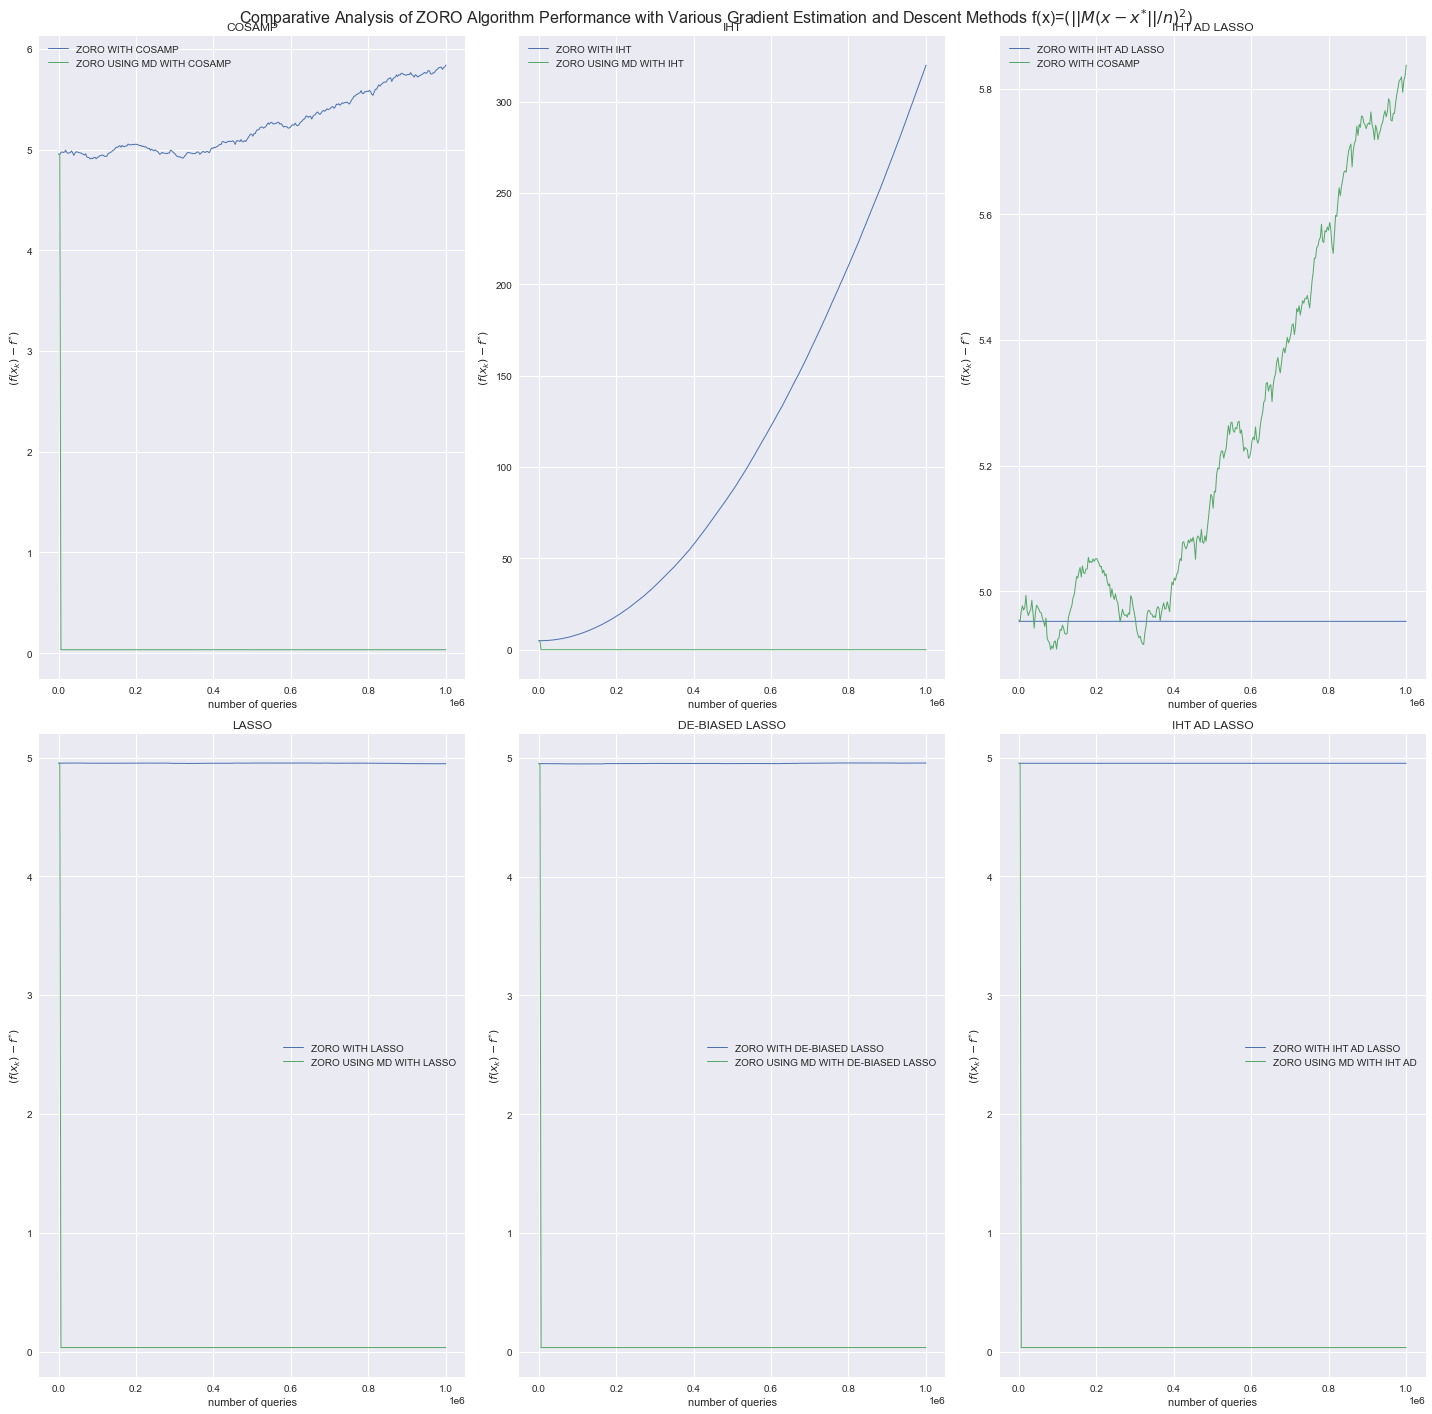

In [53]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(20, 20))

ax1 = axs[0, 0]
ax1.plot(np.array(performance_log_ZORO_Co[:,0]), np.array((performance_log_ZORO_Co[:,1])), linewidth=1, label='ZORO WITH COSAMP')
ax1.plot(performance_log_ZORO_Co_MD[:, 0], (performance_log_ZORO_Co_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH COSAMP')
ax1.set_xlabel('number of queries')
ax1.set_ylabel('$(f(x_{k})-f^{*})$')
ax1.set_title('COSAMP')
ax1.legend()

ax2 = axs[0, 1]
ax2.plot(performance_log_ZORO_IHT[:, 0], (performance_log_ZORO_IHT[:, 1]), linewidth=1, label='ZORO WITH IHT')
ax2.plot(performance_log_ZORO_IHT_MD[:, 0], (performance_log_ZORO_IHT_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH IHT')
ax2.set_xlabel('number of queries')
ax2.set_ylabel('$(f(x_{k})-f^{*})$')
ax2.set_title('IHT')
ax2.legend()

ax3 = axs[1, 0]
ax3.plot(performance_log_ZORO_Lasso[:, 0], (performance_log_ZORO_Lasso[:, 1]), linewidth=1, label='ZORO WITH LASSO')
ax3.plot(performance_log_ZORO_Lasso_MD[:, 0], (performance_log_ZORO_Lasso_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH LASSO')
ax3.set_xlabel('number of queries')
ax3.set_ylabel('$(f(x_{k})-f^{*})$')
ax3.set_title('LASSO')
ax3.legend()

ax4 = axs[1, 1]
ax4.plot(performance_log_ZORO_DLasso[:, 0], (performance_log_ZORO_DLasso[:, 1]), linewidth=1, label='ZORO WITH DE-BIASED LASSO')
ax4.plot(performance_log_ZORO_DLasso_MD[:, 0], (performance_log_ZORO_DLasso_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH DE-BIASED LASSO')
ax4.set_xlabel('number of queries')
ax4.set_ylabel('$(f(x_{k})-f^{*})$')
ax4.set_title('DE-BIASED LASSO')
ax4.legend()

ax5 = axs[1, 2]
ax5.plot(performance_log_ZORO_IHT_ad[:, 0], (performance_log_ZORO_IHT_ad[:, 1]), linewidth=1, label='ZORO WITH IHT AD LASSO')
ax5.plot(performance_log_ZORO_IHT_ad_MD[:, 0], (performance_log_ZORO_IHT_ad_MD[:, 1]), linewidth=1, label='ZORO USING MD WITH IHT AD')
ax5.set_xlabel('number of queries')
ax5.set_ylabel('$(f(x_{k})-f^{*})$')
ax5.set_title('IHT AD LASSO')
ax5.legend()

ax6 = axs[0, 2]
ax6.plot(performance_log_ZORO_IHT_ad[:, 0], (performance_log_ZORO_IHT_ad[:, 1]), linewidth=1, label='ZORO WITH IHT AD LASSO')
ax6.plot(np.array(performance_log_ZORO_Co[:,0]), np.array((performance_log_ZORO_Co[:,1])), linewidth=1, label='ZORO WITH COSAMP')
ax6.set_xlabel('number of queries')
ax6.set_ylabel('$(f(x_{k})-f^{*})$')
ax6.set_title('IHT AD LASSO')
ax6.legend()

plt.suptitle("Comparative Analysis of ZORO Algorithm Performance with Various Gradient Estimation and Descent Methods f(x)=$(||M(x-x^{*}||/n)^{2}$)", fontsize=16)
plt.tight_layout()
plt.show()
